<a href="https://colab.research.google.com/github/soumyakrath/IMTPDS2021/blob/main/GitHub-pwd/BigMartSales_missing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
library(tidyverse)

In [5]:
options(warn=-1)

In [ ]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [6]:
martdata<-read.csv('https://raw.githubusercontent.com/soumyakrath/IMTPDS2021/main/GitHub-pwd/BigMartSales_train.csv', sep=',',head= TRUE)

In [7]:
data(martdata)

In [8]:
dim(martdata)

[1] 8523   12

In [9]:
str(martdata)

'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : chr  "FDA15" "DRC01" "FDN15" "FDX07" ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : chr  "Low Fat" "Regular" "Low Fat" "Regular" ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : chr  "Dairy" "Soft Drinks" "Meat" "Fruits and Vegetables" ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT018" "OUT049" "OUT010" ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "Medium" "Medium" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 3" "Tier 1" "Tier 3" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type2" "Supermarket Type1" "Grocery Store" ...
 $ Item_Outlet_Sales        : num  3735 443 2097 732 995 ...


In [10]:
summary(martdata)

 Item_Identifier     Item_Weight     Item_Fat_Content   Item_Visibility  
 Length:8523        Min.   : 4.555   Length:8523        Min.   :0.00000  
 Class :character   1st Qu.: 8.774   Class :character   1st Qu.:0.02699  
 Mode  :character   Median :12.600   Mode  :character   Median :0.05393  
                    Mean   :12.858                      Mean   :0.06613  
                    3rd Qu.:16.850                      3rd Qu.:0.09459  
                    Max.   :21.350                      Max.   :0.32839  
                    NA's   :1463                                         
  Item_Type            Item_MRP      Outlet_Identifier 
 Length:8523        Min.   : 31.29   Length:8523       
 Class :character   1st Qu.: 93.83   Class :character  
 Mode  :character   Median :143.01   Mode  :character  
                    Mean   :140.99                     
                    3rd Qu.:185.64                     
                    Max.   :266.89                     
                

In [12]:
head(martdata,5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.30,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,DRC01,5.92,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDN15,17.50,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,FDX07,19.20,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
5,NCD19,8.93,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
tail(martdata)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
8518,FDF53,20.750,reg,0.08360656,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.636
8519,FDF22,6.865,Low Fat,0.05678339,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383
8520,FDS36,8.380,Regular,0.04698243,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.285
8521,NCJ29,10.600,Low Fat,0.03518627,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.114
8522,FDN46,7.210,Regular,0.14522065,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.598
8523,DRG01,14.800,Low Fat,0.04487828,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.670


In [14]:
names(martdata)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

In [15]:
unique(martdata$Item_Fat_Content)

[1] "Low Fat" "Regular" "low fat" "LF"      "reg"

In [16]:
unique(martdata$Item_Type)

[1] "Dairy"                 "Soft Drinks"           "Meat"                 
 [4] "Fruits and Vegetables" "Household"             "Baking Goods"         
 [7] "Snack Foods"           "Frozen Foods"          "Breakfast"            
[10] "Health and Hygiene"    "Hard Drinks"           "Canned"               
[13] "Breads"                "Starchy Foods"         "Others"               
[16] "Seafood"

In [17]:
unique(martdata$Outlet_Size)

[1] "Medium" ""       "High"   "Small"

In [18]:
unique(martdata$Outlet_Location_Type)

[1] "Tier 1" "Tier 3" "Tier 2"

In [19]:
unique(martdata$Outlet_Type)

[1] "Supermarket Type1" "Supermarket Type2" "Grocery Store"    
[4] "Supermarket Type3"

In [20]:
table(martdata$Item_Fat_Content)


     LF low fat Low Fat     reg Regular 
    316     112    5089     117    2889 

In [21]:
table(martdata$Item_Type)


         Baking Goods                Breads             Breakfast 
                  648                   251                   110 
               Canned                 Dairy          Frozen Foods 
                  649                   682                   856 
Fruits and Vegetables           Hard Drinks    Health and Hygiene 
                 1232                   214                   520 
            Household                  Meat                Others 
                  910                   425                   169 
              Seafood           Snack Foods           Soft Drinks 
                   64                  1200                   445 
        Starchy Foods 
                  148 

In [22]:
table(martdata$Outlet_Size)


         High Medium  Small 
  2410    932   2793   2388 

In [23]:
table(martdata$Outlet_Location_Type)


Tier 1 Tier 2 Tier 3 
  2388   2785   3350 

In [24]:
table(martdata$Outlet_Type)


    Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3 
             1083              5577               928               935 

In [25]:
sum(is.na(martdata$Item_Weight))

[1] 1463

In [26]:
sum(is.na(martdata$Outlet_Size))

[1] 0

In [27]:
martdata[martdata == ""] <- NA

In [28]:
sum(is.na(martdata$Outlet_Size))

[1] 2410

In [29]:
table(martdata$Outlet_Size)


  High Medium  Small 
   932   2793   2388 

In [30]:
write.csv(martdata,file="BigMart_updated.csv")

In [31]:
sum(is.na(martdata))

[1] 3873

In [32]:
#missing data percentage of total
p<-function(x) {sum(is.na(x)/length(x)*100)}
apply(martdata,2,p)

Item_Identifier               Item_Weight          Item_Fat_Content 
                  0.00000                  17.16532                   0.00000 
          Item_Visibility                 Item_Type                  Item_MRP 
                  0.00000                   0.00000                   0.00000 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                  0.00000                   0.00000                  28.27643 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                  0.00000                   0.00000                   0.00000

In [34]:
# MICE(multiple imputation by chained equation) 
install.packages("mice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
library(mice)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Outlet_Size,
4650,1,1,1,1,1,1,1,1,1,1,1,1,0
2410,1,1,1,1,1,1,1,1,1,1,1,0,1
1463,1,1,1,1,1,1,1,1,1,1,0,1,1
,0,0,0,0,0,0,0,0,0,0,1463,2410,3873


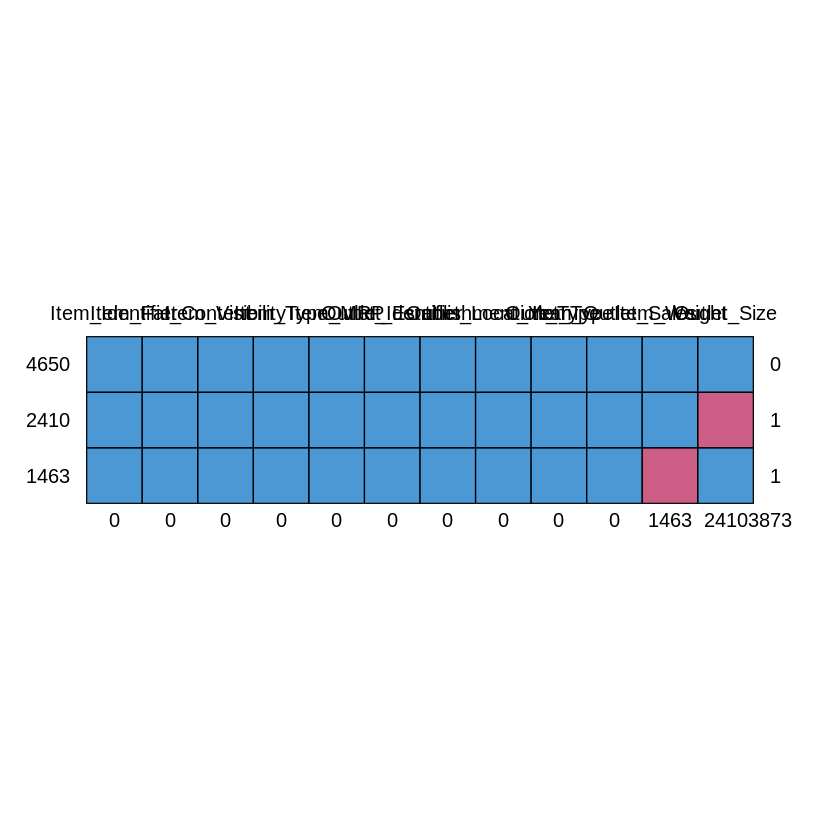

In [37]:
md.pattern(martdata)

In [39]:
md.pairs(martdata)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Item_Weight,7060,7060,7060,7060,7060,7060,7060,7060,4650,7060,7060,7060
Item_Fat_Content,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Item_Visibility,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Item_Type,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Item_MRP,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Outlet_Identifier,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Outlet_Establishment_Year,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
Outlet_Size,6113,4650,6113,6113,6113,6113,6113,6113,6113,6113,6113,6113
Outlet_Location_Type,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523


In [46]:
#Predictive Mean Matching (PMM)
impute <- mice(martdata[,1:12], m=3, seed = 123)
print(impute)


 iter imp variable
  1   1  Item_Weight
  1   2  Item_Weight
  1   3  Item_Weight
  2   1  Item_Weight
  2   2  Item_Weight
  2   3  Item_Weight
  3   1  Item_Weight
  3   2  Item_Weight
  3   3  Item_Weight
  4   1  Item_Weight
  4   2  Item_Weight
  4   3  Item_Weight
  5   1  Item_Weight
  5   2  Item_Weight
  5   3  Item_Weight
Class: mids
Number of multiple imputations:  3 
Imputation methods:
          Item_Identifier               Item_Weight          Item_Fat_Content 
                       ""                     "pmm"                        "" 
          Item_Visibility                 Item_Type                  Item_MRP 
                       ""                        ""                        "" 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                       ""                        ""                        "" 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                       ""                   

In [47]:
impute$imp$Item_Weight

,1,2,3
,<dbl>,<dbl>,<dbl>
8,11.650,19.000,17.600
19,7.930,14.350,11.300
22,8.600,6.480,14.500
24,7.390,17.350,4.920
30,14.700,14.000,14.500
37,8.380,19.850,8.270
39,6.110,17.600,12.650
40,9.895,13.100,20.700
50,15.100,17.850,5.905


In [48]:
martdata[179,]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
179,DRY23,NA,Regular,0.1910137,Soft Drinks,42.1112,OUT019,1985,Small,Tier 1,Grocery Store,42.6112


In [49]:
martdata[8350,]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
8350,FDN15,NA,Low Fat,0.01665302,Meat,139.518,OUT027,1985,Medium,Tier 3,Supermarket Type3,2936.178


In [50]:
summary(martdata$Item_Weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  4.555   8.774  12.600  12.858  16.850  21.350    1463 

In [51]:
# Complete data
newMART <- complete(impute, 1)

In [53]:
head(newMART)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800
5,NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [54]:
newMART[179,]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
179,DRY23,7.155,Regular,0.1910137,Soft Drinks,42.1112,OUT019,1985,Small,Tier 1,Grocery Store,42.6112


In [69]:
sum(is.na(newMART$Item_Weight))

[1] 0

In [56]:
summary(newMART)

 Item_Identifier     Item_Weight     Item_Fat_Content   Item_Visibility  
 Length:8523        Min.   : 4.555   Length:8523        Min.   :0.00000  
 Class :character   1st Qu.: 8.695   Class :character   1st Qu.:0.02699  
 Mode  :character   Median :12.600   Mode  :character   Median :0.05393  
                    Mean   :12.844                      Mean   :0.06613  
                    3rd Qu.:16.850                      3rd Qu.:0.09459  
                    Max.   :21.350                      Max.   :0.32839  
  Item_Type            Item_MRP      Outlet_Identifier 
 Length:8523        Min.   : 31.29   Length:8523       
 Class :character   1st Qu.: 93.83   Class :character  
 Mode  :character   Median :143.01   Mode  :character  
                    Mean   :140.99                     
                    3rd Qu.:185.64                     
                    Max.   :266.89                     
 Outlet_Establishment_Year Outlet_Size        Outlet_Location_Type
 Min.   :1985          

In [57]:
dim(newMART)

[1] 8523   12

In [59]:
table(newMART$Outlet_Size)


  High Medium  Small 
   932   2793   2388 

In [60]:
sum(is.na(newMART$Outlet_Size))

[1] 2410

In [62]:
val <- unique(newMART$Outlet_Size[!is.na(newMART$Outlet_Size)])                 # Values in Outlet_Size
val


[1] "Medium" "High"   "Small"

In [64]:
my_mode <- val[which.max(tabulate(match(newMART$Outlet_Size, val)))]   # Mode of Outlet_Size
my_mode

[1] "Medium"

In [65]:
newMART$Outlet_Size[is.na(newMART$Outlet_Size)] <- my_mode                     # Impute by mode

In [66]:
sum(is.na(newMART$Outlet_Size))

[1] 0

In [67]:
table(newMART$Outlet_Size)


  High Medium  Small 
   932   5203   2388 

In [70]:
write.csv(newMART,file="New_BigMart_updated.csv")